## Cross entropy法の練習

このプログラムでは，関数を最大化する点を見つける方法として，cross entropy法を練習します。

In [94]:
import numpy as np

def Cem(objfunc, x_min=0, x_max=2, dim=1, iterMax=10, sampleNum=700, eliteNum=200):

    mean = None
    std = None
    sampleSet = None
    valueSet = None

    for i in range(iterMax):

        if i == 0:
            sampleSet_i = np.random.uniform(x_min, x_max, (sampleNum, dim))
        else:
            sampleSet_i = np.random.normal(loc=mean, scale=std, size=sampleNum)

        sampleSet = np.reshape(sampleSet_i, (sampleNum, -1))
        # 
        valueSet = objfunc(sampleSet)

        value_sort = np.sort(valueSet, axis=None)
        #return 0
        # print('value_sort', value_sort)
        data_num = sampleSet.shape[0]
        v_cut = value_sort[data_num - eliteNum -1]

        # print('sampleSet', sampleSet.shape)
        # print('valueSet', valueSet.shape)
        print('v_cut', v_cut)
        idx = (valueSet.flatten() > v_cut)
        
        # ガウス分布から作られたｘを入力したobjfuncの出力のうち、vcutよりも値が大きい上位のデータ
        valueSetCut = valueSet[idx]
        # ガウス分布からサンプルされた出力のうち、vcutよりも値が大きい上位のデータ
        sampleSetCut = sampleSet[idx, :]
    
        #if i>599:
            #return 0

        # print('sampleSetCut.shape', sampleSetCut.shape)
        mean = np.mean(sampleSetCut)
        std = np.std(sampleSetCut)
        print('mean = ', mean)
        print('std = ', std)
        print('----------------------------')

        sampleSetList = list(sampleSetCut)
        valueSetList = list(valueSetCut)


    return mean

ここで，テスト用の関数として $f(x) = x \sin(x)$を使います。

In [95]:
def test_func(x):
    
    return x * np.sin(x)

このテスト関数はグラフに書いてみると以下のようになります。

In [96]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = test_func(X)

In [97]:
import matplotlib.pyplot as plt
if False:
    plt.plot(X, y, label=r"$f(x) = x \sin(x)$")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    _ = plt.title("True generative process")

このテスト関数を最大化するxをcross entropy法を用いて発見します。

In [98]:
dim = 1

x_max = 10
x_min = 0
y_max = -10
y_min = 10

N = 20000

mean = Cem(test_func, dim=dim, x_max=x_max, x_min=x_min)

print('mean', mean)

v_cut 1.7966439459282733
mean =  7.359484605091921
std =  1.881786583160976
----------------------------
v_cut 5.823574177730905
mean =  7.895826194732174
std =  0.4097558627565204
----------------------------
v_cut 7.812498722817221
mean =  7.980556518422998
std =  0.09535686487358695
----------------------------
v_cut 7.911101094260016
mean =  7.982125995844086
std =  0.022189339149492705
----------------------------
v_cut 7.916479091405965
mean =  7.978624081878306
std =  0.004498007073854164
----------------------------
v_cut 7.9167147726799785
mean =  7.978564762486813
std =  0.000993639182185665
----------------------------
v_cut 7.916726838102535
mean =  7.97869336304733
std =  0.00021519952710996365
----------------------------
v_cut 7.916727346116485
mean =  7.978664726228153
std =  4.76209875416186e-05
----------------------------
v_cut 7.916727370280104
mean =  7.978665721251559
std =  9.635878009831246e-06
----------------------------
v_cut 7.916727371524877
mean =  7.97866

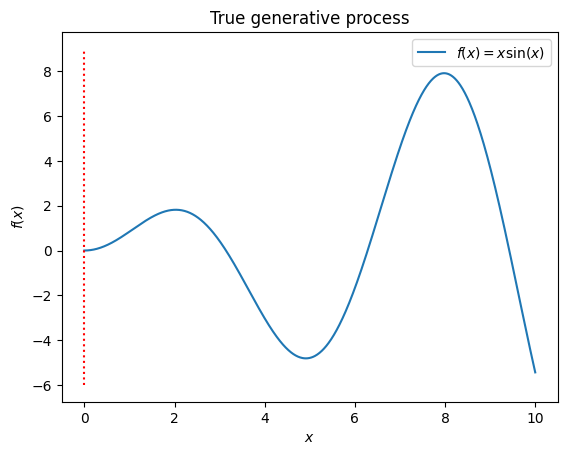

In [65]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

plt.vlines(mean, -6, 9, color='r', linestyles='dotted')